In [340]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [341]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [342]:
uvinitial = numpy.load('./uvinitial.npz')
U0 = uvinitial['U']
V0 = uvinitial['V']

In [343]:
def func(U, V, Du, Dv, F, k, nt, dt, dh):
    for n in range (nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = Un[1:-1,1:-1] + Du *\
               (dt/dh**2*(Un[2:,1:-1] - 2*Un[1:-1,1:-1] + Un[:-2,1:-1]) +\
                dt/dh**2*(Un[1:-1,2:] - 2*Un[1:-1,1:-1] + Un[1:-1,:-2])) -\
                Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2*dt + F*dt*(1.-Un[1:-1,1:-1])
                
        V[1:-1,1:-1] = Vn[1:-1,1:-1] + Dv *\
               (dt/dh**2*(Vn[2:,1:-1] - 2*Vn[1:-1,1:-1] + Vn[:-2,1:-1]) +\
                dt/dh**2*(Vn[1:-1,2:] - 2*Vn[1:-1,1:-1] + Vn[1:-1,:-2])) +\
                Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2*dt - (F+k)*Vn[1:-1,1:-1]*dt
                
        # Enforce Neumann BCs
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1] 
        
    return U

In [344]:
U = func(U0, V0, Du, Dv, F, k, nt, dt, dh)

In [345]:
uans = U[100,::40]

In [346]:
numpy.round(uans, 4)

array([ 0.9247,  0.8501,  0.6682,  0.902 ,  0.904 ])

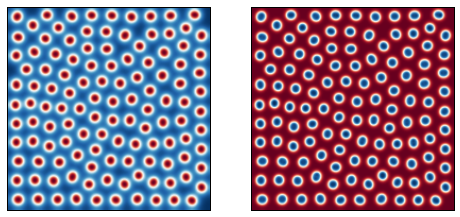

In [347]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);